In [214]:
!pip install faker textblob wordcloud

In [215]:
import pandas as pd
from faker import Faker

fake = Faker()

def generate_data(rows=100):
    data = []
    for _ in range(rows):
        entry = {
            'UserID': fake.uuid4(),
            'Username': fake.user_name(),
            'Email': fake.email(),
            'Name': fake.name(),
            'Address': fake.address().replace("\n", ", "),
            'Joined_Date': fake.date_this_decade(),
            'Last_Login': fake.date_this_year(),
            'Account_Balance': round(fake.random_number(digits=5, fix_len=True) * 0.01, 2),
            'Status': fake.random_element(elements=('Active', 'Inactive', 'Suspended')),
            'Age': fake.random_int(min=18, max=85),
            'Gender': fake.random_element(elements=('Male', 'Female', 'Non-Binary', 'Prefer not to say')),
            'Nationality': fake.country(),
            'Number_of_Logins': fake.random_int(min=1, max=100),
            'Last_Purchase_Date': fake.date_this_year(),
            'Favorite_Category': fake.random_element(elements=('Electronics', 'Apparel', 'Groceries', 'Books', 'Home & Kitchen')),
            'Referral_Code': fake.lexify(text='REF??????', letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'),
            'Subscription_Type': fake.random_element(elements=('Basic', 'Premium', 'Platinum')),
            'Account_Creation_Date': fake.date_this_decade(),
            'Password_Reset_Count': fake.random_int(min=0, max=10),
            'Credit_Card_Last4': fake.credit_card_number(card_type='mastercard')[-4:],
            'Total_Spent': round(fake.random_number(digits=5, fix_len=True) * 0.01, 2),
            'Rewards_Points': fake.random_int(min=0, max=5000),
            'Phone_Number': fake.phone_number(),
            'Alternative_Email': fake.email(),
            'Newsletter_Subscription': fake.boolean(),
            'Marketing_Preference': fake.random_element(elements=('Email', 'SMS', 'None')),
            'Theme_Preference': fake.random_element(elements=('Light', 'Dark')),
            'Last_Login_Device': fake.random_element(elements=('Mobile', 'Desktop', 'Tablet')),
            'Last_Login_IP': fake.ipv4(),
            'Preferred_Language': fake.random_element(elements=('English', 'Spanish', 'French', 'German', 'Chinese')),
            'Profile_Completion_Percentage': fake.random_int(min=10, max=100),
            'Bio': fake.sentence(),
            'Profile_Picture_URL': fake.image_url(),
            'Two_Factor_Authentication': fake.boolean(),
            'Latitude': fake.latitude(),
            'Longitude': fake.longitude(),
            'City': fake.city(),
            'State': fake.state(),
            'Country': fake.country()
        }
        data.append(entry)
    return data

df = pd.DataFrame(generate_data(10000))
df.to_csv('Okane_net_data.csv', index=False)

In [216]:
df = pd.read_csv('Okane_net_data.csv')
print(df['Age'].describe())

count    10000.000000
mean        51.395400
std         19.687469
min         18.000000
25%         34.000000
50%         51.000000
75%         69.000000
max         85.000000
Name: Age, dtype: float64


Distribution of Age

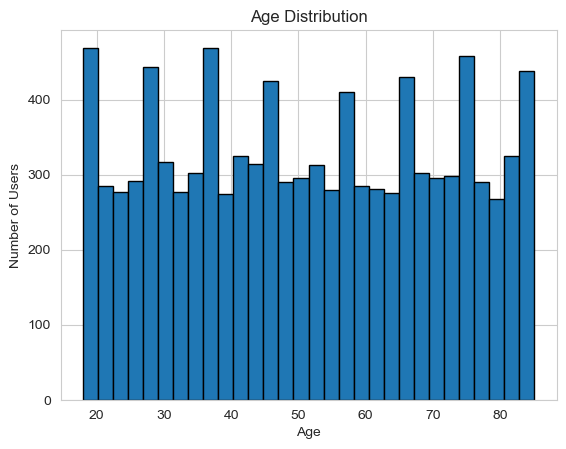

In [217]:
import matplotlib.pyplot as plt
df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

Distribution of Gender

Non-Binary           2579
Male                 2526
Prefer not to say    2449
Female               2446
Name: Gender, dtype: int64


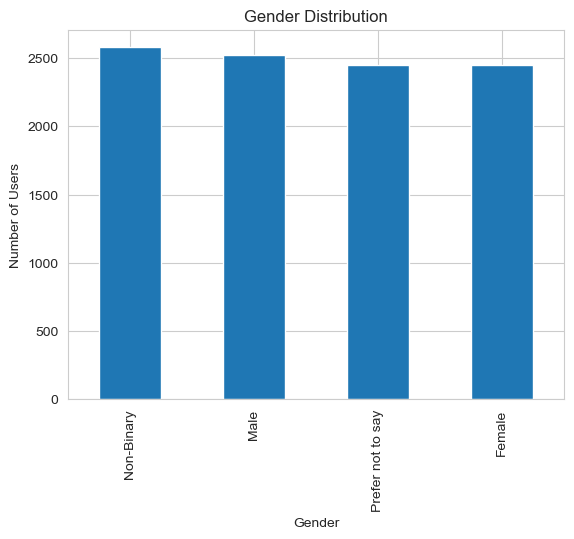

In [218]:
print(df['Gender'].value_counts())

# Bar chart for Gender distribution
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

Distribution of Nationality

Korea                        85
Congo                        82
Bouvet Island (Bouvetoya)    60
Isle of Man                  56
Ireland                      55
                             ..
Estonia                      27
Iraq                         27
Cayman Islands               27
Guadeloupe                   25
Mayotte                      24
Name: Nationality, Length: 243, dtype: int64


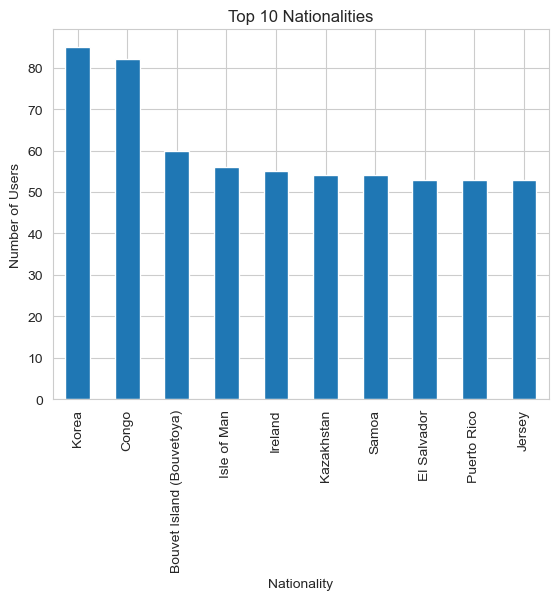

In [219]:
print(df['Nationality'].value_counts())

# Bar chart for Nationality distribution (consider plotting only the top N nationalities for clarity)
top_n = 10
df['Nationality'].value_counts()[:top_n].plot(kind='bar')
plt.title('Top {} Nationalities'.format(top_n))
plt.xlabel('Nationality')
plt.ylabel('Number of Users')
plt.show()

Distribution of Account Status (Active, Inactive, Suspended)

Inactive     3393
Suspended    3307
Active       3300
Name: Status, dtype: int64


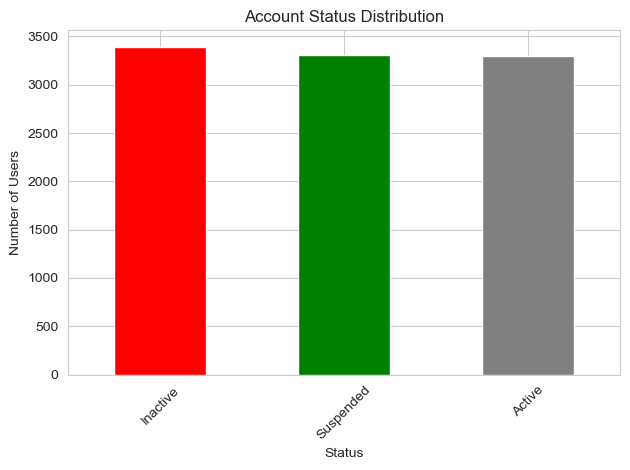

In [220]:
print(df['Status'].value_counts())

# Bar chart for Account Status distribution
import matplotlib.pyplot as plt
df['Status'].value_counts().plot(kind='bar', color=['red', 'green', 'grey'])
plt.title('Account Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribution of Subscription Types

Basic       3355
Platinum    3338
Premium     3307
Name: Subscription_Type, dtype: int64


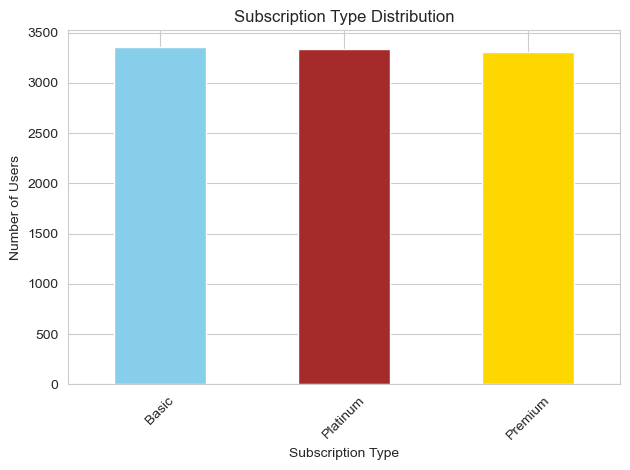

In [221]:
print(df['Subscription_Type'].value_counts())

# Bar chart for Subscription Types distribution
df['Subscription_Type'].value_counts().plot(kind='bar', color=['skyblue','brown','gold'])
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Account Balance

In [222]:
avg_balance = df['Account_Balance'].mean()
print(f"Average Account Balance: ${avg_balance:.2f}")

Average Account Balance: $549.89


Total Money Spent by Users

In [223]:
total_spent = df['Total_Spent'].sum()
print(f"Total Money Spent by Users: ${total_spent:.2f}")

Total Money Spent by Users: $5500029.55


Distribution of Rewards Points

In [224]:
rewards_stats = df['Rewards_Points'].describe()
print(rewards_stats)

count    10000.00000
mean      2508.54920
std       1438.72035
min          0.00000
25%       1267.00000
50%       2508.00000
75%       3745.25000
max       5000.00000
Name: Rewards_Points, dtype: float64


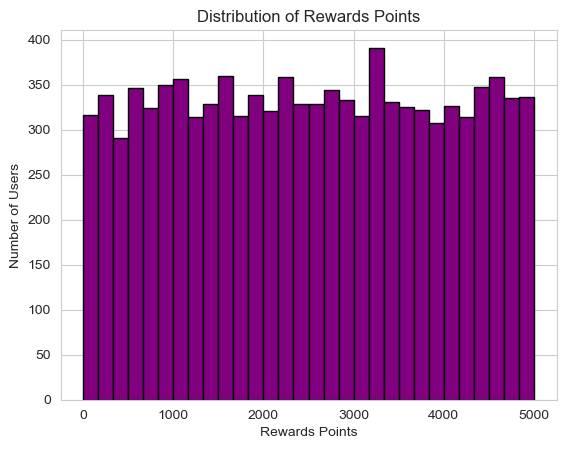

In [225]:
import matplotlib.pyplot as plt

plt.hist(df['Rewards_Points'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Rewards Points')
plt.xlabel('Rewards Points')
plt.ylabel('Number of Users')
plt.show()

Number of Users Who Have Spent Above a Certain Threshold

In [226]:
threshold = 1000
high_spenders = df[df['Total_Spent'] > threshold]
num_high_spenders = len(high_spenders)

print(f"Number of users who have spent more than ${threshold}: {num_high_spenders}")

Number of users who have spent more than $1000: 0


Correlation Between Account Balance and Total Spent

In [227]:
correlation = df['Account_Balance'].corr(df['Total_Spent'])
print(f"Correlation between Account Balance and Total Spent: {correlation:.2f}")

Correlation between Account Balance and Total Spent: -0.00


Users With the Highest Rewards Points and Their Corresponding Total Expenditure

In [228]:
top_users = df.sort_values(by='Rewards_Points', ascending=False).head(5)
print(top_users[['Username', 'Rewards_Points', 'Total_Spent']])

           Username  Rewards_Points  Total_Spent
1247   stephenjones            5000       542.54
9157    greenrachel            5000       270.84
4710  sparksmelissa            5000       645.90
4037        mwagner            5000       312.61
6327      davismary            4999       114.00


Distribution of Newsletter Subscription

In [229]:
newsletter_counts = df['Newsletter_Subscription'].value_counts()
print(newsletter_counts)

False    5079
True     4921
Name: Newsletter_Subscription, dtype: int64


Distribution of Marketing Preference

In [230]:
marketing_pref_counts = df['Marketing_Preference'].value_counts()
print(marketing_pref_counts)

SMS      3383
None     3382
Email    3235
Name: Marketing_Preference, dtype: int64


Distribution of Theme Preference

In [231]:
theme_pref_counts = df['Theme_Preference'].value_counts()
print(theme_pref_counts)

Dark     5015
Light    4985
Name: Theme_Preference, dtype: int64


Preferred Language of Users

In [232]:
language_pref_counts = df['Preferred_Language'].value_counts()
print(language_pref_counts)

English    2034
German     2032
Spanish    1984
French     1981
Chinese    1969
Name: Preferred_Language, dtype: int64


Percentage of Users with Two Factor Authentication Enabled

In [233]:
two_factor_counts = df['Two_Factor_Authentication'].value_counts()
print(two_factor_counts)

False    5048
True     4952
Name: Two_Factor_Authentication, dtype: int64


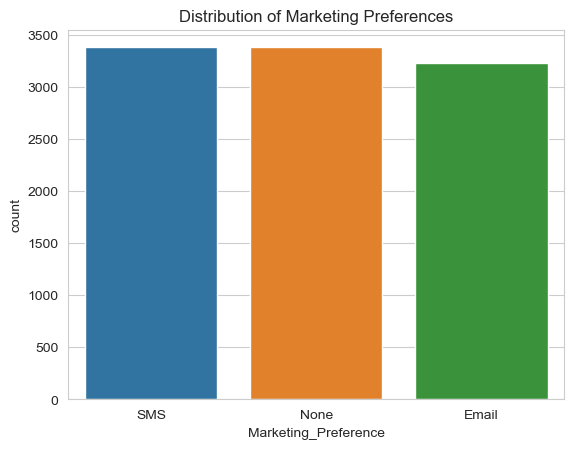

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distribution of Marketing Preferences
sns.countplot(data=df, x='Marketing_Preference')
plt.title('Distribution of Marketing Preferences')
plt.show()

Login Behavior

Average Number of Logins

In [235]:
avg_logins = df['Number_of_Logins'].mean()
print(f"Average Number of Logins: {avg_logins:.2f}")

Average Number of Logins: 50.97


Distribution of Last Login Device

In [236]:
device_counts = df['Last_Login_Device'].value_counts()
print(device_counts)

Desktop    3381
Tablet     3316
Mobile     3303
Name: Last_Login_Device, dtype: int64


Purchasing Behavior

In [237]:
df['Joined_Date'] = pd.to_datetime(df['Joined_Date'])
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])

df['Time_to_Purchase'] = (df['Last_Purchase_Date'] - df['Joined_Date']).dt.days

# Identify frequent shoppers (e.g., those who made a purchase within a month of joining)
frequent_shoppers = df[df['Time_to_Purchase'] <= 30].shape[0]

# Identify infrequent shoppers (e.g., those who took more than a year to make a purchase)
infrequent_shoppers = df[df['Time_to_Purchase'] > 365].shape[0]

print(f"Frequent Shoppers: {frequent_shoppers}")
print(f"Infrequent Shoppers: {infrequent_shoppers}")

Frequent Shoppers: 1133
Infrequent Shoppers: 6353


Favorite Categories

In [238]:
favorite_categories = df['Favorite_Category'].value_counts()
print(favorite_categories)

Apparel           2063
Home & Kitchen    2017
Electronics       2011
Groceries         1959
Books             1950
Name: Favorite_Category, dtype: int64


Referral System

In [239]:
# Assuming empty strings or NaNs indicate no referral code:
users_with_referral = df[df['Referral_Code'].notna() & (df['Referral_Code'] != "")].shape[0]

print(f"Users with a Referral Code: {users_with_referral}")

Users with a Referral Code: 10000


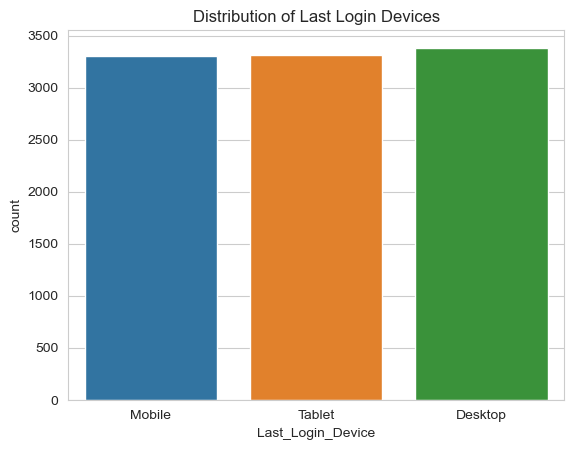

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='Last_Login_Device')
plt.title('Distribution of Last Login Devices')
plt.show()

Calculate the Time Difference between Join Date and Last Purchase Date

In [241]:
import pandas as pd

df['Joined_Date'] = pd.to_datetime(df['Joined_Date'])
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])

df['Days_Before_Purchase'] = (df['Last_Purchase_Date'] - df['Joined_Date']).dt.days

Identify Frequent and Infrequent Shoppers

In [242]:
frequent_shoppers = df[df['Days_Before_Purchase'] <= 30].shape[0]
infrequent_shoppers = df[df['Days_Before_Purchase'] > 180].shape[0]

print(f"Frequent Shoppers (purchased within 30 days of joining): {frequent_shoppers}")
print(f"Infrequent Shoppers (took over 180 days to purchase): {infrequent_shoppers}")

Frequent Shoppers (purchased within 30 days of joining): 1133
Infrequent Shoppers (took over 180 days to purchase): 7776


Visualization

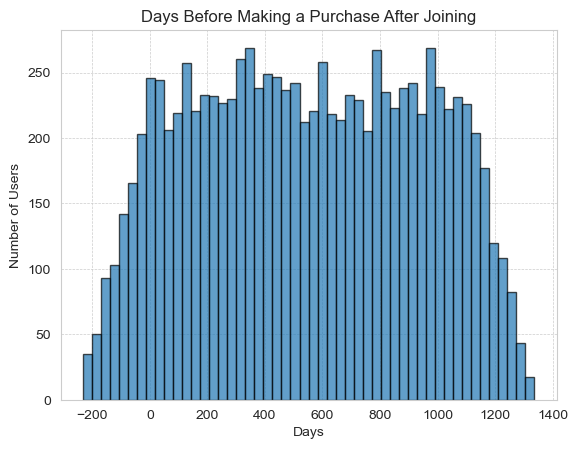

In [243]:
import matplotlib.pyplot as plt

plt.hist(df['Days_Before_Purchase'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Days Before Making a Purchase After Joining')
plt.xlabel('Days')
plt.ylabel('Number of Users')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Count Occurrences of Each Category

In [244]:
category_counts = df['Favorite_Category'].value_counts()
print(category_counts)

Apparel           2063
Home & Kitchen    2017
Electronics       2011
Groceries         1959
Books             1950
Name: Favorite_Category, dtype: int64


Visualization

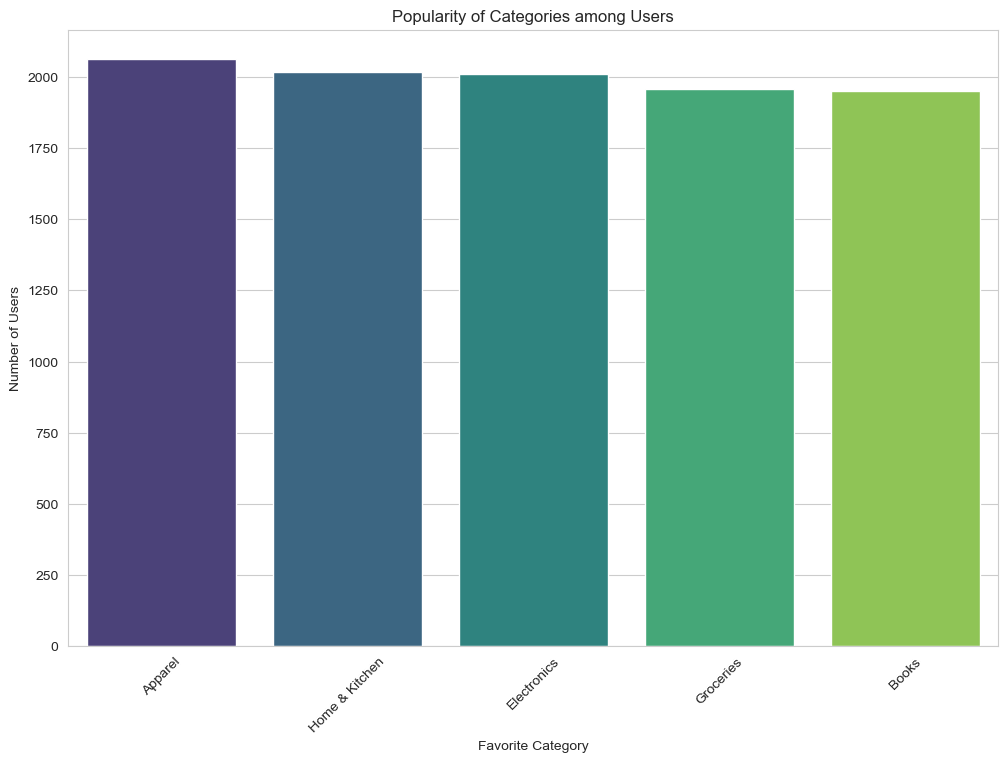

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Popularity of Categories among Users')
plt.xlabel('Favorite Category')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

Determine Users With Referral Code

In [246]:
users_with_referral = df[df['Referral_Code'].notnull() & (df['Referral_Code'] != "")].shape[0]

Print Results

In [247]:
total_users = df.shape[0]
users_without_referral = total_users - users_with_referral
print(f"Number of users with a referral code: {users_with_referral}")
print(f"Number of users without a referral code: {users_without_referral}")

Number of users with a referral code: 10000
Number of users without a referral code: 0


Percentage Calculation

In [248]:
percentage_with_referral = (users_with_referral / total_users) * 100
print(f"Percentage of users with a referral code: {percentage_with_referral:.2f}%")

Percentage of users with a referral code: 100.00%


User Distribution: Heatmap based on Latitude and Longitude

In [249]:
import plotly.express as px

fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='Account_Balance', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

Cities or States with the Most Users

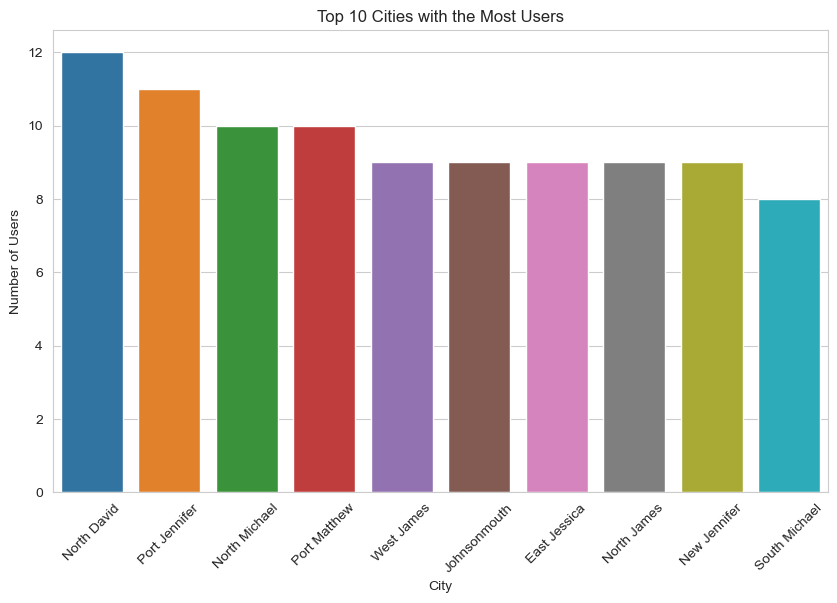

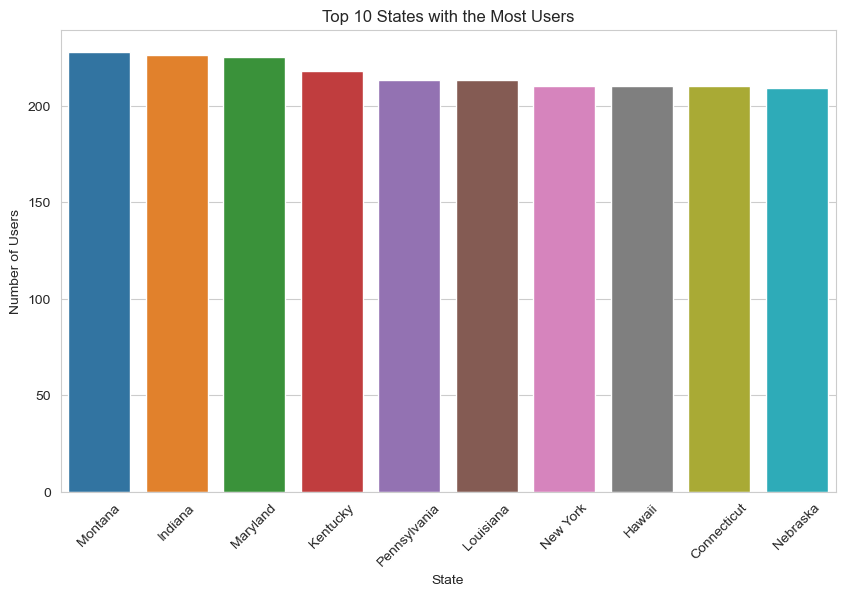

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count users by City
city_counts = df['City'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Top 10 Cities with the Most Users')
plt.ylabel('Number of Users')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

# Similarly, for states:
state_counts = df['State'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Top 10 States with the Most Users')
plt.ylabel('Number of Users')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

Country Analysis

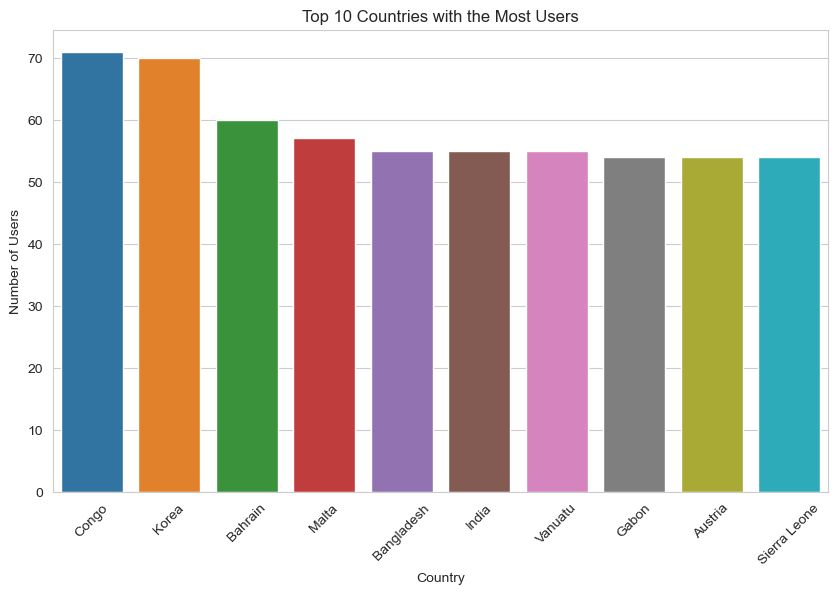

In [251]:
country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries with the Most Users')
plt.ylabel('Number of Users')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

Joining Trend

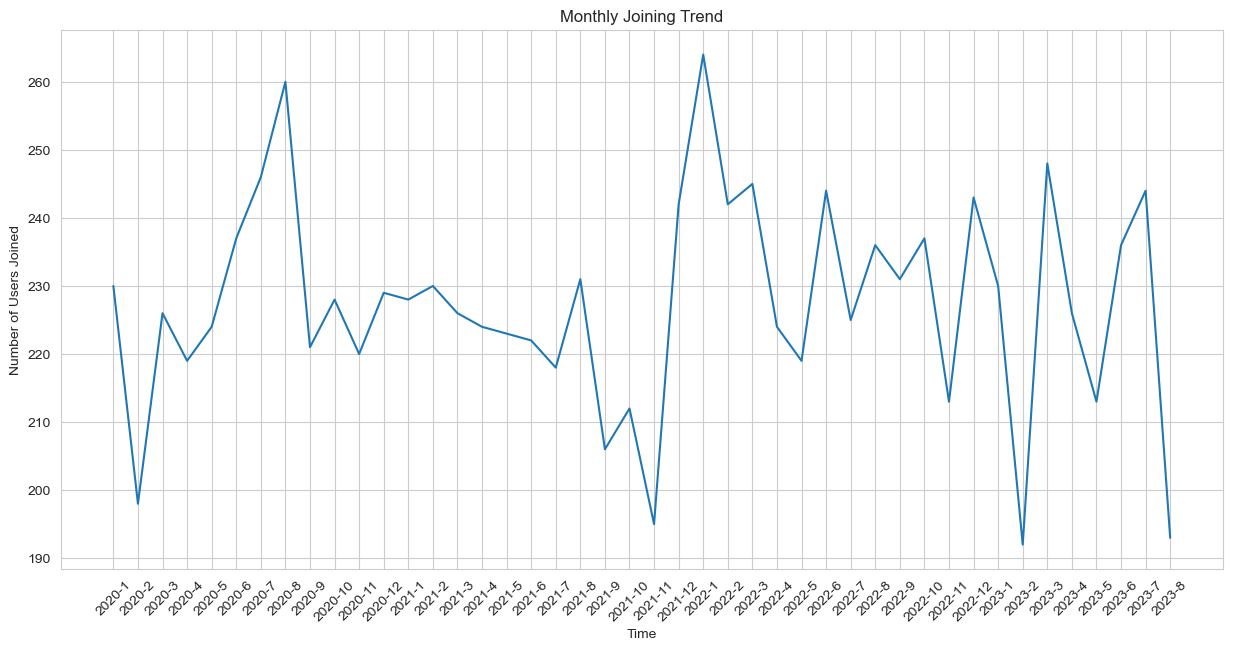

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named df
# Convert the Joined_Date column to a datetime object
df['Joined_Date'] = pd.to_datetime(df['Joined_Date'])

# Extract year and month
df['Join_Year'] = df['Joined_Date'].dt.year
df['Join_Month'] = df['Joined_Date'].dt.month

# Group by year and month to get counts
join_counts = df.groupby(['Join_Year', 'Join_Month']).size().reset_index(name='Counts')

# Plot
plt.figure(figsize=(15, 7))
sns.lineplot(x=join_counts['Join_Year'].astype(str) + '-' + join_counts['Join_Month'].astype(str), y=join_counts['Counts'])
plt.xticks(rotation=45)
plt.title('Monthly Joining Trend')
plt.ylabel('Number of Users Joined')
plt.xlabel('Time')
plt.show()

Purchase Trend

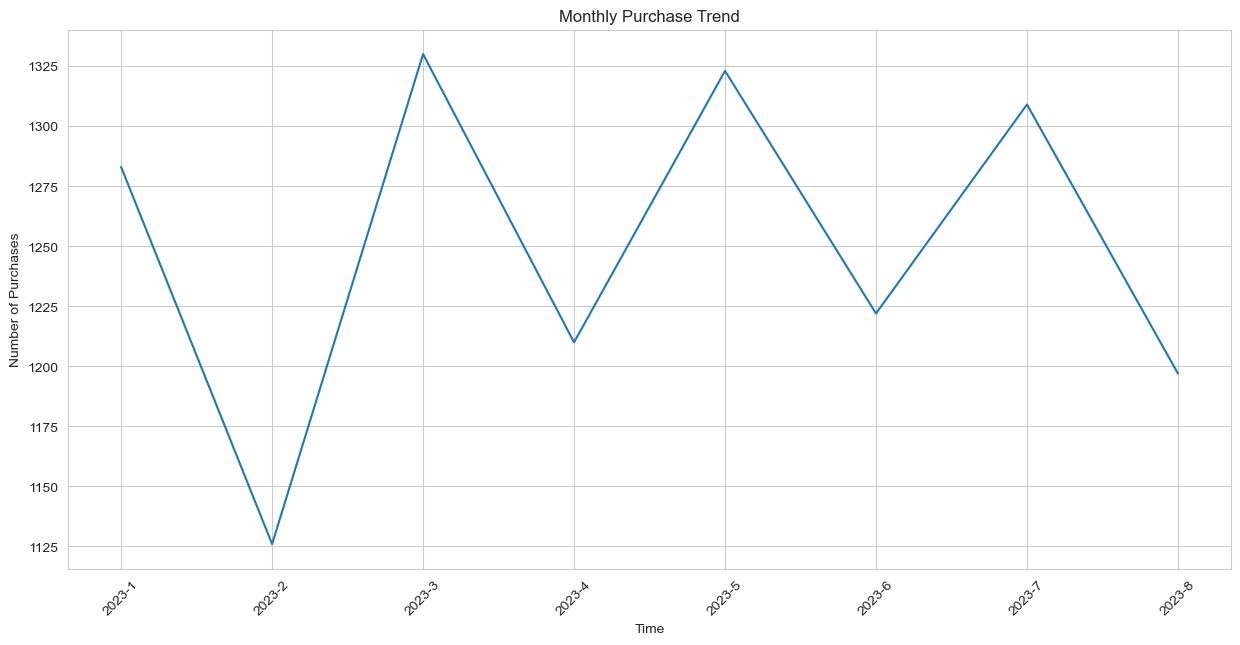

In [253]:
# Convert the Last_Purchase_Date column to a datetime object
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])

# Extract year and month
df['Purchase_Year'] = df['Last_Purchase_Date'].dt.year
df['Purchase_Month'] = df['Last_Purchase_Date'].dt.month

# Group by year and month to get counts
purchase_counts = df.groupby(['Purchase_Year', 'Purchase_Month']).size().reset_index(name='Counts')

# Plot
plt.figure(figsize=(15, 7))
sns.lineplot(x=purchase_counts['Purchase_Year'].astype(str) + '-' + purchase_counts['Purchase_Month'].astype(str), y=purchase_counts['Counts'])
plt.xticks(rotation=45)
plt.title('Monthly Purchase Trend')
plt.ylabel('Number of Purchases')
plt.xlabel('Time')
plt.show()

Spending Behavior

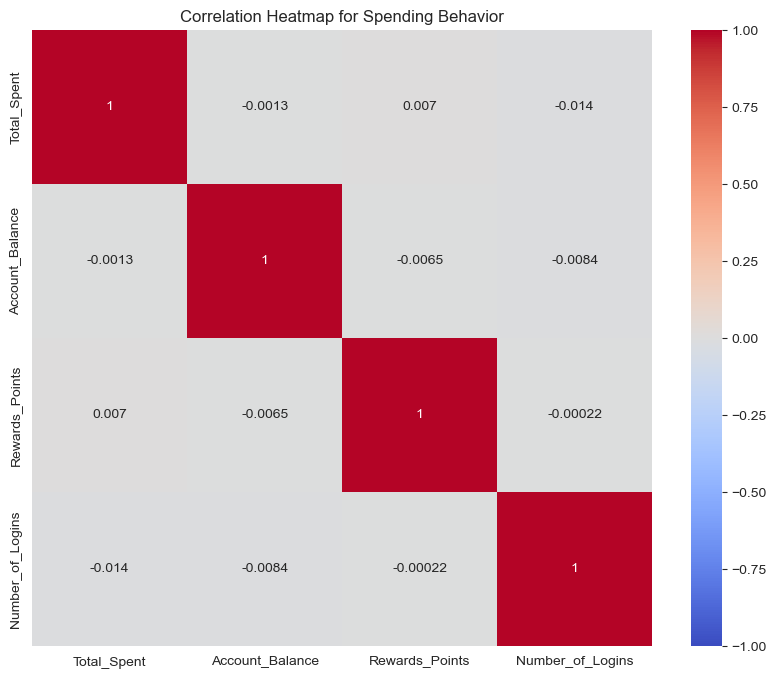

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is the name of your DataFrame
correlation_metrics = df[['Total_Spent', 'Account_Balance', 'Rewards_Points', 'Number_of_Logins']].corr()

# Plotting the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_metrics, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Spending Behavior')
plt.show()

Subscription Type vs Spending

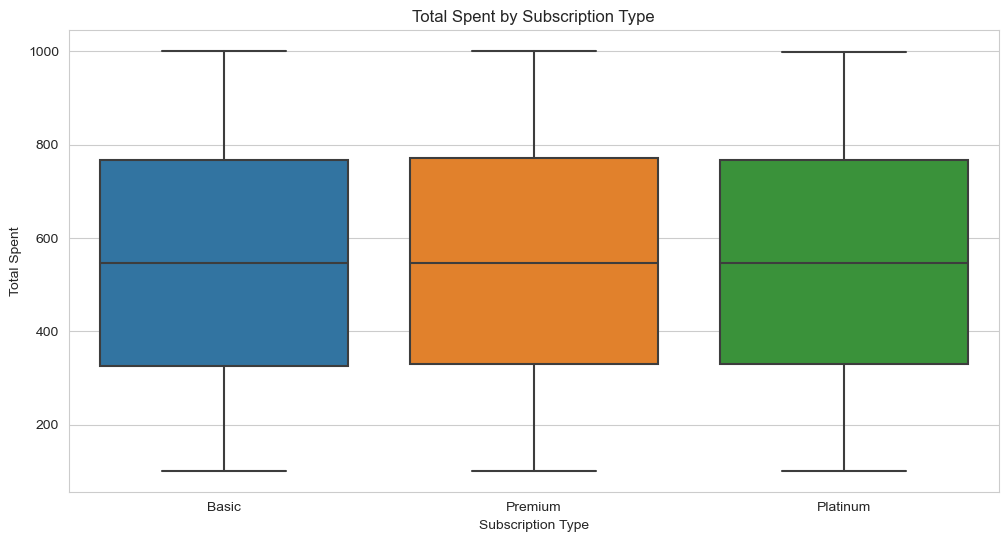

In [255]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Subscription_Type', y='Total_Spent', data=df, order=["Basic", "Premium", "Platinum"])
plt.title('Total Spent by Subscription Type')
plt.ylabel('Total Spent')
plt.xlabel('Subscription Type')
plt.show()

Password Reset

In [256]:
frequent_reset_users = df.sort_values(by='Password_Reset_Count', ascending=False).head(10)  # Adjust 10 to whatever number of top users you'd like to see
print(frequent_reset_users[['UserID', 'Username', 'Password_Reset_Count']])

                                    UserID        Username  \
9447  f171dc6e-7ec9-4e5c-8f63-f019a2f41b9b       claudia66   
2335  2ee275b4-9ece-458c-bd70-2a45d1da8f42   gonzalezcraig   
7598  79f2f053-5565-4e21-9a5a-e6198757c06d  rhondaanderson   
8240  edfafd6a-fc81-4daa-8e30-5e3f500441a6  gordonvictoria   
2337  294db071-2a23-4f43-8676-2adcc71d9af7   doylejonathan   
4874  734ce16b-2136-4554-806e-27ed412c5d01         david41   
2885  f1a9494f-97c0-4398-8672-cffc79fde6a8      rachelking   
2659  cbb83966-f366-438c-8524-4a5c3e80e597      brittany25   
5218  f9bee8a9-945c-4b05-a285-a19804de2d55         pflores   
632   973fb89c-bda2-4617-a00c-89d69af9a8df  kevindavenport   

      Password_Reset_Count  
9447                    10  
2335                    10  
7598                    10  
8240                    10  
2337                    10  
4874                    10  
2885                    10  
2659                    10  
5218                    10  
632                     10 

Two-Factor Authentication (2FA)

In [257]:
users_with_2FA = df[df['Two_Factor_Authentication'] == True]
print(f"Number of users with 2FA enabled: {len(users_with_2FA)}")

Number of users with 2FA enabled: 4952


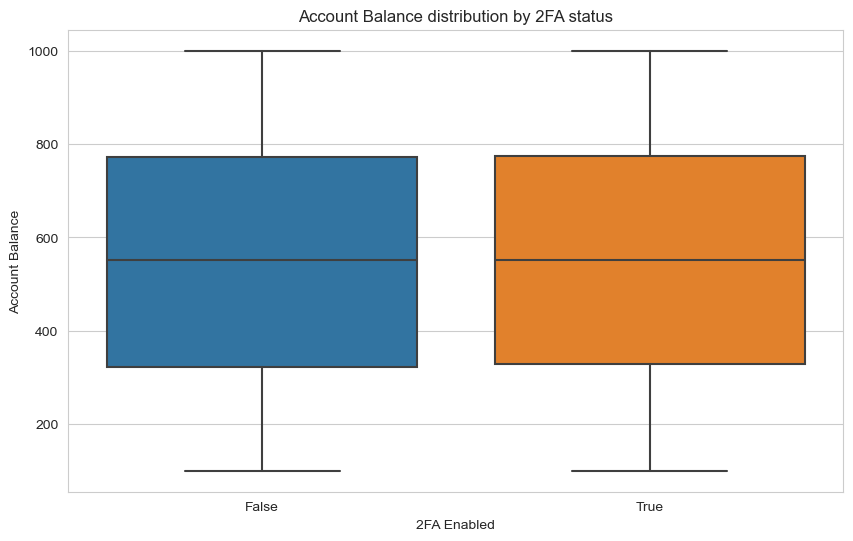

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Two_Factor_Authentication', y='Account_Balance', data=df)
plt.title('Account Balance distribution by 2FA status')
plt.ylabel('Account Balance')
plt.xlabel('2FA Enabled')
plt.show()

Profile Completion

In [259]:
# Calculate the correlation values
correlation_metrics = df[['Profile_Completion_Percentage', 'Number_of_Logins', 'Total_Spent', 'Account_Balance']].corr()

print(correlation_metrics['Profile_Completion_Percentage'])

Profile_Completion_Percentage    1.000000
Number_of_Logins                 0.009838
Total_Spent                     -0.009876
Account_Balance                 -0.005412
Name: Profile_Completion_Percentage, dtype: float64


Newsletter Subscription

In [260]:
average_logins_subscribed = df[df['Newsletter_Subscription'] == True]['Number_of_Logins'].mean()
average_logins_not_subscribed = df[df['Newsletter_Subscription'] == False]['Number_of_Logins'].mean()

print(f"Average number of logins for users subscribed to the newsletter: {average_logins_subscribed:.2f}")
print(f"Average number of logins for users not subscribed to the newsletter: {average_logins_not_subscribed:.2f}")

Average number of logins for users subscribed to the newsletter: 51.01
Average number of logins for users not subscribed to the newsletter: 50.93


Correlation with Total Spent

In [261]:
average_spent_subscribed = df[df['Newsletter_Subscription'] == True]['Total_Spent'].mean()
average_spent_not_subscribed = df[df['Newsletter_Subscription'] == False]['Total_Spent'].mean()

print(f"Average total spent by users subscribed to the newsletter: ${average_spent_subscribed:.2f}")
print(f"Average total spent by users not subscribed to the newsletter: ${average_spent_not_subscribed:.2f}")

Average total spent by users subscribed to the newsletter: $551.25
Average total spent by users not subscribed to the newsletter: $548.80


In [262]:
!pip install xgboost

In [263]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Load the data
data = pd.read_csv('Okane_net_data.csv')

# Feature Engineering

# Convert dates to datetime format
data['Last_Purchase_Date'] = pd.to_datetime(data['Last_Purchase_Date'])
data['Joined_Date'] = pd.to_datetime(data['Joined_Date'])

# Calculate time since last purchase
data['Days_Since_Last_Purchase'] = (datetime.now() - data['Last_Purchase_Date']).dt.days

# Calculate average time between purchases
data['Average_Days_Between_Purchases'] = data['Days_Since_Last_Purchase'] / data['Number_of_Logins']

# We can include 'Account_Balance' and 'Number_of_Logins' directly as features

# Labeling
# For instance, if a user hasn't made a purchase in the last 180 days, mark them as churned
data['Churned'] = np.where(data['Days_Since_Last_Purchase'] > 180, 1, 0)

# Features and target
X = data[['Days_Since_Last_Purchase', 'Average_Days_Between_Purchases', 'Account_Balance', 'Number_of_Logins']]
y = data['Churned']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection: For demonstration, let's use RandomForest. You can swap this with other models for comparison.
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 1.0
ROC-AUC: 1.0
Precision: 1.0
Recall: 1.0


Spending Prediction

In [264]:
# Replace 'user_id' with 'UserID'
data['prev_purchase_amount'] = data.groupby('UserID')['Total_Spent'].shift()
data['freq_of_purchases'] = data['Number_of_Logins']  # Using logins as a proxy for purchase frequency

# Convert 'Last_Purchase_Date' to datetime and then compute time since last purchase
data['Last_Purchase_Date'] = pd.to_datetime(data['Last_Purchase_Date'])
latest_timestamp = data['Last_Purchase_Date'].max()
data['time_since_last_purchase'] = (latest_timestamp - data['Last_Purchase_Date']).dt.days

# Create your target variable
y_amount = data['Total_Spent']  # For amount prediction
y_category = data['Favorite_Category']  # For category prediction

# Create features dataframe
X = data[['prev_purchase_amount', 'freq_of_purchases', 'time_since_last_purchase']]

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Drop the feature with all NaN values from the training and testing sets
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to our data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Continue with the model training using the imputed data
model = RandomForestRegressor()  
model.fit(X_train_imputed, y_train)

predictions = model.predict(X_test_imputed)

# Evaluation
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")


MAE: 0.015160000000000003
MSE: 0.004861700000000001
R2 Score: 0.9739313443719972


Text Analysis

Import necessary libraries and read the dataset

In [266]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Read the dataset
df = pd.read_csv('Okane_net_data.csv')

Basic Data Cleaning

In [267]:
df = df.dropna(subset=['Bio'])

Common Words

In [268]:
# Combine all the bios into one string
all_bios = ' '.join(df['Bio'].tolist())

# Tokenize the text
word_freq = Counter(all_bios.split())

# Get the 10 most common words
common_words = word_freq.most_common(10)
print("Most Common Words:")
print(common_words)


Most Common Words:
[('reality', 57), ('international', 54), ('at', 54), ('challenge', 53), ('along', 52), ('Mrs', 52), ('still', 52), ('light', 52), ('indeed', 52), ('prepare', 51)]


Topic Modeling

In [269]:
# Initialize a CountVectorizer to create a term-document matrix
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
term_matrix = vectorizer.fit_transform(df['Bio'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5)  # assuming we want to extract 5 topics
lda.fit(term_matrix)

# Display top 10 words for each topic
for index, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]
    print(f"Top 10 words for Topic #{index + 1}: {', '.join(top_words)}")

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [ ]:
from textblob import TextBlob

bio = "Your sample biography text here."
analysis = TextBlob(bio)

if analysis.sentiment.polarity > 0:
    print("Positive")
elif analysis.sentiment.polarity == 0:
    print("Neutral")
else:
    print("Negative")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
term_matrix = vectorizer.fit_transform(preprocessed_text)

lda = LatentDirichletAllocation(n_components=5)  # for extracting 5 topics
lda.fit(term_matrix)

for index, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]
    print(f"Top 10 words for Topic #{index}: {', '.join(top_words)}")

In [134]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
df = pd.read_csv('Okane_net_data.csv')
# Download stopwords
nltk.download('stopwords')

# Download wordnet for lemmatization
nltk.download('wordnet')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rober\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rober\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rober\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Text Preprocessing:
Define a function to preprocess text which includes:
Tokenization.
Lowercasing.
Lemmatization.
Stopword removal.
Apply this function to the 'Bio' column in your dataframe.

In [270]:
# Preprocess the Bio column
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

df['Bio_tokens'] = df['Bio'].apply(preprocess_text)

In [271]:
# Combine all tokens for frequency analysis
all_tokens = [token for sublist in df['Bio_tokens'].tolist() for token in sublist]

from collections import Counter
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(10)
print(common_words)

[('mr', 121), ('tonight', 85), ('reality', 83), ('indeed', 81), ('world', 80), ('level', 80), ('far', 79), ('relationship', 78), ('bring', 78), ('many', 77)]


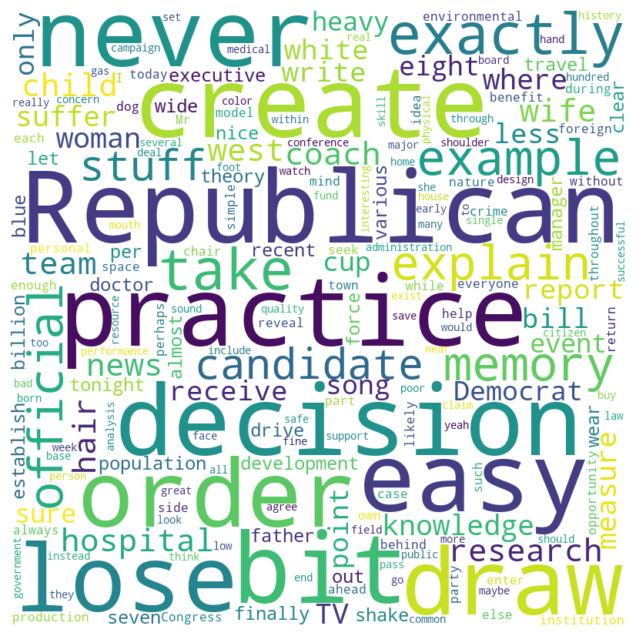

In [213]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", width=800, height=800).generate_from_frequencies(word_freq)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()